In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
grain   = {
    'path': 'grain.jpg',
    'k': 8,
    'iters': 100,
    'repeats': 4
}
lena    = {
    'path': 'lena.jpg',
    'k': 3,
    'iters': 100,
    'repeats': 4
}
peppers = {
    'path': 'peppers.jpg',
    'k': 5,
    'iters': 100,
    'repeats': 4
}
images = [grain, lena, peppers]
np.random.seed(7)

In [3]:
def clusterize(X, k, interations, repeats):
    F_best, C_best = None, None

    # repeat evaluation <repeats> times
    for r in range(repeats):
        # sample random centroids for init
        rand_idx  = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[rand_idx]

        for _ in range(interations):
            # classify each point based on euclidean distances to current centroids
            distances = euclidean_distances(X, centroids)
            clusters = np.argmin(distances, axis=1)
            # recalculate centroids based on points classification
            old_centroids = np.copy(centroids)
            for cluster in np.unique(clusters):
                centroids[cluster] = np.mean(X[clusters == cluster], axis=0)
            
            # stop if centroids didn't change
            if (old_centroids == centroids).all():
                break

        # classify each point based on euclidean distances to best centroids for current repetition
        distances = euclidean_distances(X, centroids)
        clusters = np.argmin(distances, axis=1)
        # calculate functional for current prediction
        functional = distances[np.arange(X.shape[0]), clusters].mean()
        # update functional and points clusterization
        if F_best == None or functional < F_best:
            F_best = functional
            C_best = centroids
    
    # classify each point based on euclidean distances to best centroids 
    distances = euclidean_distances(X, C_best)
    clusters = np.argmin(distances, axis=1)
    return clusters, C_best

In [4]:
def load_img(path):
    image = np.array(Image.open(path))
    return image, image.reshape(-1, image.shape[2])

def save_img(image, path):
    Image.fromarray(image).save(path)

def run(data):
    print(f"run clusterization on {data['path']} for {data['k']} clusters ({data['iters']} iters / {data['repeats']} repeats)")
    image, X = load_img(data['path'])
    clusters, centroids = clusterize(X, data['k'], data['iters'], data['repeats'])
    Y = np.zeros(X.shape, dtype=X.dtype)
    Y[np.arange(X.shape[0])] = centroids[clusters]
    image_clust = Y.reshape(image.shape)
    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].set_title(data['path'])
    ax[0].imshow(image)
    ax[1].set_title('clust_' + data['path'])
    ax[1].imshow(image_clust)
    save_img(image_clust, 'clust_' + data['path'])

run clusterization on grain.jpg for 8 clusters (100 iters / 4 repeats)


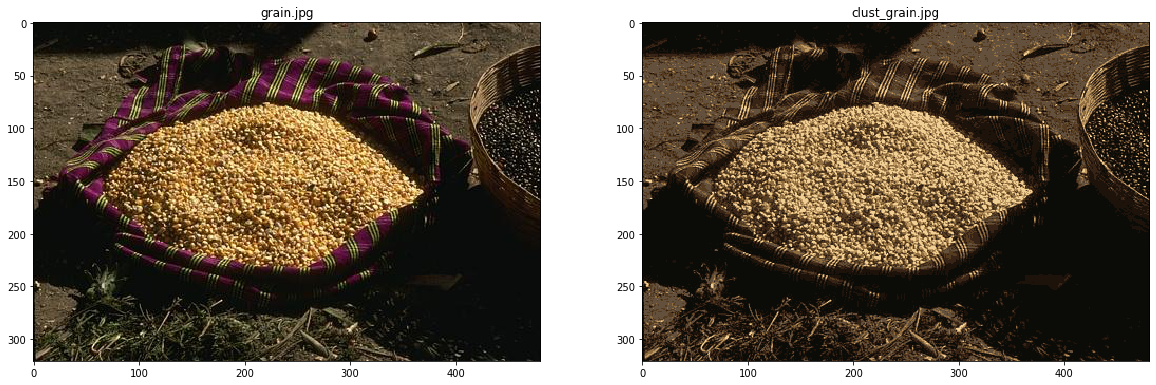

In [5]:
run(grain)

run clusterization on lena.jpg for 3 clusters (100 iters / 4 repeats)


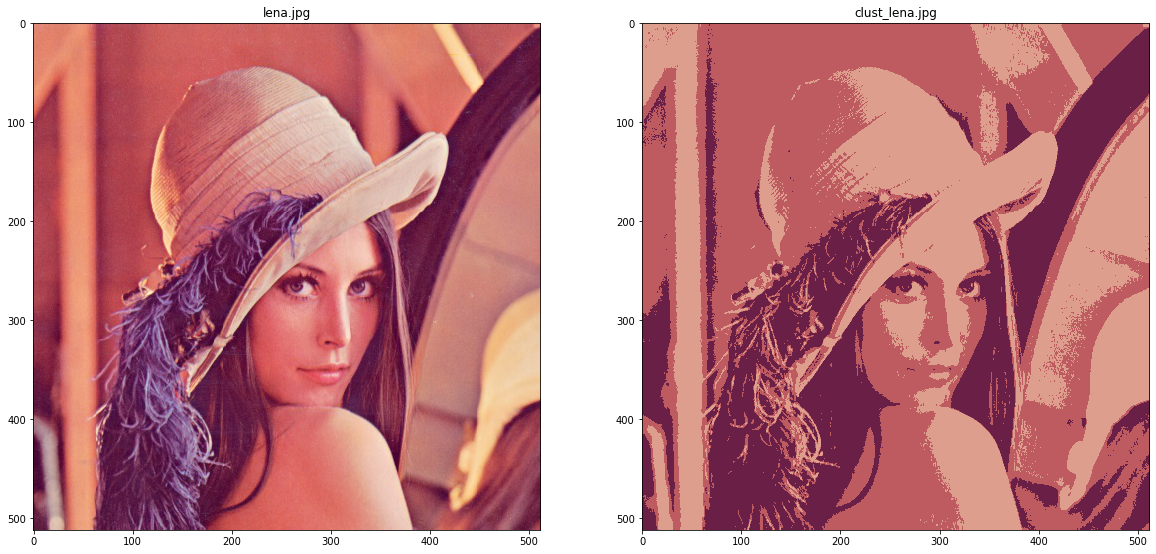

In [6]:
run(lena)

run clusterization on peppers.jpg for 5 clusters (100 iters / 4 repeats)


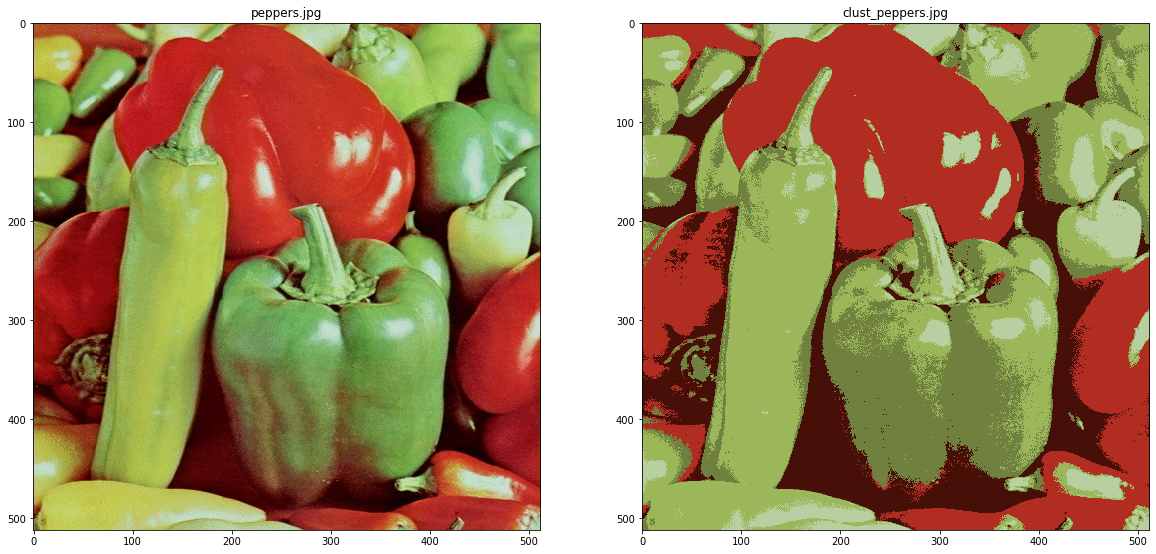

In [7]:
run(peppers)